### Importing the required libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import joblib

In [ ]:
filename=''

In [2]:
#reading the splitted datasets 
df= pd.read_csv(filename)

In [3]:
df.head()

,meal_id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,diff,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93
0,1885,1,136.83,152.29,0,0,177,2.0,15.46,0,0,1,0,0,0,1,0,0,0,0
1,1885,2,135.83,152.29,0,0,323,2.0,16.46,0,0,1,0,0,0,1,0,0,0,0
2,1885,3,132.92,133.92,0,0,96,2.0,1.00,0,0,1,0,0,0,1,0,0,0,0
3,1885,4,135.86,134.86,0,0,163,2.0,-1.00,0,0,1,0,0,0,1,0,0,0,0
4,1885,5,146.50,147.50,0,0,215,2.0,1.00,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df.drop(columns=['meal_id', 'week','diff'], inplace=True)

In [5]:
df.head()
df['checkout_price'], df['base_price'], df['op_area']=df['checkout_price']/200, df['base_price']/200, df['op_area']/4

In [6]:
X= df.drop(columns=['num_orders']).values
Y= df.num_orders.values
X.reshape(-1,16)
Y.reshape(-1)

array([177, 323,  96, ..., 487, 648, 447], dtype=int64)

### Splitting data into train and validation sets

In [7]:
X_train, X_val, y_train, y_val= train_test_split( X, Y, test_size=0.15, random_state=101)

### Creating the first pipeline

In [8]:
pipe1= Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=True)),('ext', RandomForestRegressor( random_state=101, max_depth=10))])

In [9]:
t=pipe1.fit(X_train, y_train)
pred1= pipe1.predict(X_val)
mse(y_val, pred1)

88485.3112570028

In [10]:
#evaluating the results of pipe1
print(mae(y_train,pipe1.predict(X_train)))
mae(y_val, pred1)

143.29058678257533


174.55233733505364

### Visualizing the performance of model

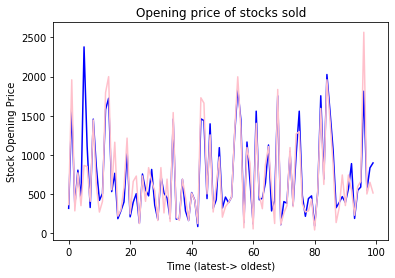

In [11]:
#train visual
from matplotlib import pyplot
a=350
pyplot.plot(pred2[:100], color= 'blue')
pyplot.plot(y_val[:100], color='pink')
pyplot.title("Opening price of stocks sold")
pyplot.xlabel("Time (latest-> oldest)")
pyplot.ylabel("Stock Opening Price")
pyplot.show()

### Adding the predictions of pipe1 as a extra parameter for pipe2

In [12]:
df['y1']= pipe2.predict(X)
df.tail()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,y1
11087,0.60655,0.59655,0,0,581,1.125,1,0,0,0,0,0,0,0,1,0,0,209.847565
11088,0.60140,0.60140,0,0,609,1.125,1,0,0,0,0,0,0,0,1,0,0,193.017117
11089,0.59170,0.59170,0,0,487,1.125,1,0,0,0,0,0,0,0,1,0,0,200.098500
11090,0.61140,0.60640,0,0,648,1.125,1,0,0,0,0,0,0,0,1,0,0,182.983053
11091,0.68885,0.68885,0,0,447,1.125,1,0,0,0,0,0,0,0,1,0,0,1052.751379


### Splitting the modified dataset

In [54]:
X= df.drop(columns=['num_orders']).values
Y= df.num_orders.values
X.reshape(-1,17)
Y.reshape(-1)
X_train1, X_val1, y_train1, y_val1 = train_test_split( X, Y, test_size=0.2, random_state=70)


### Creating the second pipeline

In [55]:
pipe2= Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=True)),('ridge',Ridge( alpha=0.01))])

In [56]:
t=pipe2.fit(X_train1, y_train1)
pred2= pipe2.predict(X_val1)
mse(y_val1, pred2)

56176.74616978104

In [57]:
#evaluating the predictions of pipe2
print(mae(y_train1,pipe2.predict(X_train1)))
mae(y_val1, pred2)

145.78233777160403


153.41127057265805